In [117]:
%config IPCompleter.greedy=True

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io


dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])
(307, 2)


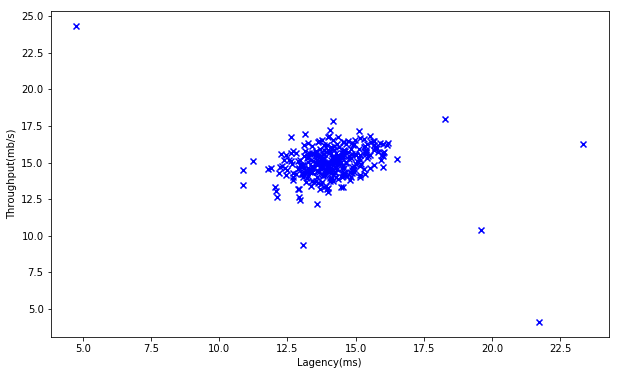

In [118]:
data1 = scipy.io.loadmat('ex8data1.mat')
print(data1.keys())
X = data1['X']
print(X.shape)
Xval = data1['Xval']
yval = data1['yval']

def plotData(X, mu, sigma2):
    plt.figure(figsize=(10,6))
    plt.xlabel('Lagency(ms)')
    plt.ylabel('Throughput(mb/s)')
    plt.scatter(X[:,0], X[:,1], marker='x', color='b')
    
    
    x = np.linspace(np.min(X[:,0]), np.max(X[:,0]), len(X))
    y = np.linspace(np.min(X[:,1]), np.max(X[:,1]), len(X))
    
    plt.show()
    
plotData(X, mu, sigma2)    

TypeError: Input z must be a 2D array.

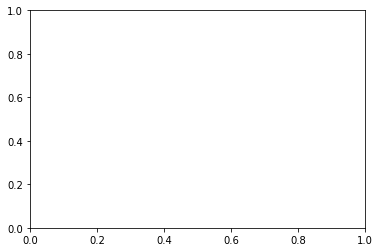

In [176]:
def estimateGaussian(X):
    m = len(X)
    mu = (1/m) * np.sum(X, axis=0)
    sigma2 = (1/m) * np.sum((X-mu) * (X-mu), axis=0)
    return mu, sigma2
mu, sigma2 = estimateGaussian(X)

def gaus(myX, mymu, mysig2):
    """
    Function to compute the gaussian return values for a feature
    matrix, myX, given the already computed mu vector and sigma matrix.
    If sigma is a vector, it is turned into a diagonal matrix
    Uses a loop over rows; I didn't quite figure out a vectorized implementation.
    """
    m = myX.shape[0]
    n = myX.shape[1]
    if np.ndim(mysig2) == 1:
        mysig2 = np.diag(mysig2)
    
    print(mysig2)
    
    norm = 1./(np.power((2*np.pi), n/2)*np.sqrt(np.linalg.det(mysig2)))
    myinv = np.linalg.inv(mysig2)
    myexp = np.zeros((m,1))
    for irow in xrange(m):
        xrow = myX[irow]
        myexp[irow] = np.exp(-0.5*((xrow-mymu).T).dot(myinv).dot(xrow-mymu))
    return norm*myexp    
    print(sigma2)
        
    #denominator = pow(2*np.pi, n/2) * pow(np.linalg.det(sigma2), 1/2)
    #numerator = np.exp((-1/2)*(X-mu).T.dot(np.linalg.inv(sigma2)).dot(X-mu))

def gaussianDistribution(X, mu, sigma2):
    m = X.shape[0]
    n = X.shape[1]
    
    if np.ndim(sigma2) == 1:
        sigma2 = np.diag(sigma2)
    
    #print(sigma2)
    
    denominator = 1/(pow(2*np.pi, n/2) * pow(np.linalg.det(sigma2), 1/2))
    p = np.zeros(m)
    for i in range(m):
        p[i] = np.exp((-1/2)*(X[i]-mu).T.dot(np.linalg.inv(sigma2)).dot(X[i]-mu))
    return p*denominator

    
#gaus(X, mu, sigma2)
p = gaussianDistribution(X, mu, sigma2)

def plotContour(X, p):
    x1 = X[:,0]
    x2 = X[:,1]
    x, y = np.meshgrid(x1, x2)
    
    plt.figure()
    plt.contour(x, y, p)
    plt.show()
    
plotContour(X, p)

In [179]:
def plotContours(mymu, mysigma2, newFig=False, useMultivariate = True):
    delta = .5
    myx = np.arange(0,30,delta)
    myy = np.arange(0,30,delta)
    meshx, meshy = np.meshgrid(myx, myy)
    coord_list = [ entry.ravel() for entry in (meshx, meshy) ]
    print(coord_list[1])
    points = np.vstack(coord_list).T
    myz = gaussianDistribution(points, mymu, mysigma2)
    #if not useMultivariate:
    #    myz = gausOrthog(points, mymu, mysigma2)
    #else: myz = gausMV(points, mymu, mysigma2)
    myz = myz.reshape((myx.shape[0],myx.shape[0]))

    if newFig: plt.figure(figsize=(6,4))
    
    cont_levels = [10**exp for exp in range(-20,0,3)]
    mycont = plt.contour(meshx, meshy, myz, levels=cont_levels)

    plt.title('Gaussian Contours',fontsize=16)

[ 0.   0.5  1.  ... 28.5 29.  29.5]


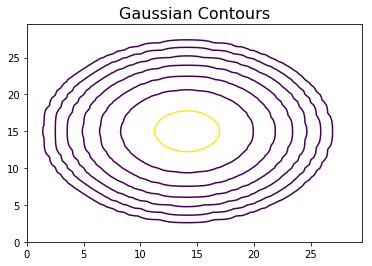

In [178]:
plotContours(mu, sigma2, True)